<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_GRU_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Model GRU Tensorflow

##1. Import dan Preprocessing Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Parameters
py_num_words = tf_num_words = 50000
py_maxlen = tf_maxlen = 500

# Load dataset
(tf_x_train, tf_y_train), (tf_x_test, tf_y_test) = imdb.load_data(num_words=tf_num_words)
tf_x_train = pad_sequences(tf_x_train, maxlen=tf_maxlen)
tf_x_test = pad_sequences(tf_x_test, maxlen=tf_maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


##2. Model GRU Tensorflow

In [2]:
tf_model_gru = Sequential([
    Embedding(tf_num_words, 128, input_length=tf_maxlen),
    GRU(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    GRU(64),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])


tf_model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model_gru.build(input_shape=(None, tf_maxlen))
tf_model_gru.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 500, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 500, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,541,057 (24.95 MB)

 Trainable params: 6,540,801 (24.95 MB)

 Non-trainable params: 256 (1.00 KB)

##3. Training

In [3]:
tf_history_gru = tf_model_gru.fit(
    tf_x_train, tf_y_train,
    epochs=5,
    batch_size=128,
    validation_data=(tf_x_test, tf_y_test)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - accuracy: 0.5213 - loss: 1.1324 - val_accuracy: 0.7536 - val_loss: 0.7603
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.8714 - loss: 0.4002 - val_accuracy: 0.8768 - val_loss: 0.3315
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9523 - loss: 0.1651 - val_accuracy: 0.8670 - val_loss: 0.3660
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9792 - loss: 0.0818 - val_accuracy: 0.8664 - val_loss: 0.4355
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9838 - loss: 0.0610 - val_accuracy: 0.8617 - val_loss: 0.4566


##4. Plot Akurasi dan Loss

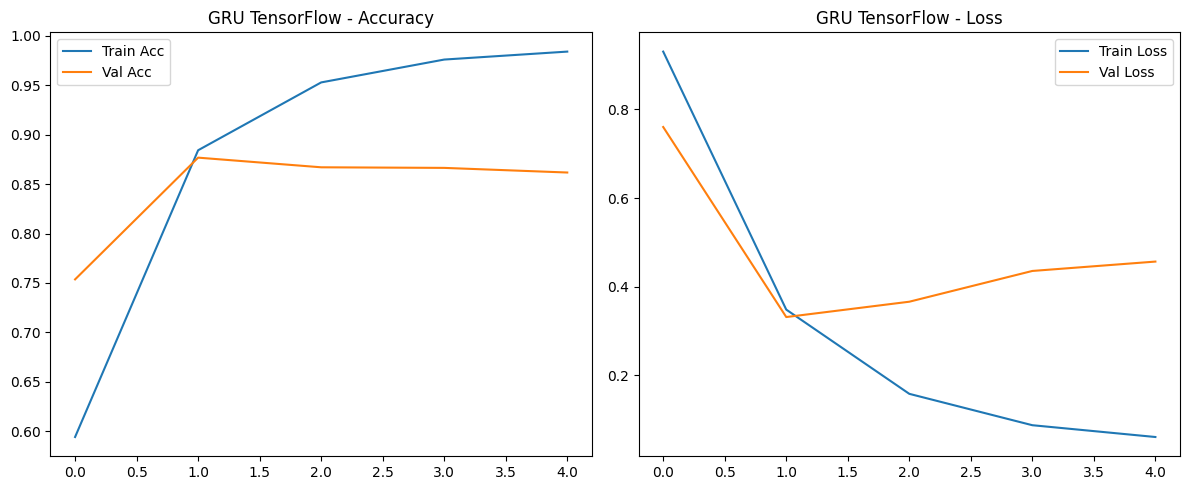

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(tf_history_gru.history['accuracy'], label='Train Acc')
plt.plot(tf_history_gru.history['val_accuracy'], label='Val Acc')
plt.title('GRU TensorFlow - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tf_history_gru.history['loss'], label='Train Loss')
plt.plot(tf_history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU TensorFlow - Loss')
plt.legend()

plt.tight_layout()
plt.show()

##5. Evaluasi Model

In [5]:
tf_y_pred_gru = (tf_model_gru.predict(tf_x_test) > 0.5).astype(int)

print("TF GRU Accuracy:", accuracy_score(tf_y_test, tf_y_pred_gru))
print("TF GRU Precision:", precision_score(tf_y_test, tf_y_pred_gru))
print("TF GRU Recall:", recall_score(tf_y_test, tf_y_pred_gru))
print("TF GRU F1 Score:", f1_score(tf_y_test, tf_y_pred_gru))
print("TF GRU AUC:", roc_auc_score(tf_y_test, tf_y_pred_gru))

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
TF GRU Accuracy: 0.86172
TF GRU Precision: 0.8676315147572974
TF GRU Recall: 0.85368
TF GRU F1 Score: 0.8605992177103915
TF GRU AUC: 0.8617199999999999


##6. ROC Curve

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step


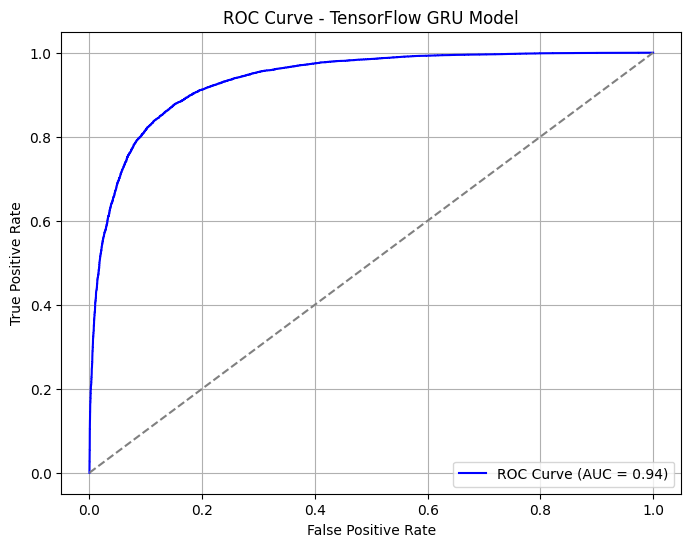

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Prediksi probabilitas (bukan kelas)
tf_y_pred_proba = tf_model_gru.predict(tf_x_test)

# 2. Hitung nilai FPR, TPR, dan threshold
fpr, tpr, thresholds = roc_curve(tf_y_test, tf_y_pred_proba)
roc_auc = auc(fpr, tpr)

# 3. Plot grafik ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow GRU Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#2) Model GRU PyTorch

##1. Model GRU

In [7]:
import torch
import torch.nn as nn

class PyTorchGRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(PyTorchGRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # GRU 1
        self.gru1 = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(0.3)

        # GRU 2
        self.gru2 = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()  # Required for BCELoss

    def forward(self, x):
        x = self.embedding(x)

        x, _ = self.gru1(x)
        x = self.dropout1(x)

        x, _ = self.gru2(x)
        x = self.dropout2(x)

        x = x[:, -1, :]  # Ambil output terakhir (last timestep)

        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x.squeeze()

##2. Konversi Numpy ke Tensor

In [10]:
from torch.utils.data import TensorDataset, DataLoader

# Konversi data numpy ke tensor
py_x_train_tensor = torch.LongTensor(tf_x_train)
py_y_train_tensor = torch.FloatTensor(tf_y_train)
py_x_test_tensor = torch.LongTensor(tf_x_test)
py_y_test_tensor = torch.FloatTensor(tf_y_test)

# Dataset dan DataLoader
py_train_dataset = TensorDataset(py_x_train_tensor, py_y_train_tensor)
py_test_dataset = TensorDataset(py_x_test_tensor, py_y_test_tensor)

py_train_loader = DataLoader(py_train_dataset, batch_size=128, shuffle=True)
py_test_loader = DataLoader(py_test_dataset, batch_size=128, shuffle=False)

##3. Training Loop

In [11]:
# Inisialisasi
py_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

py_model = PyTorchGRU(vocab_size=py_num_words, embedding_dim=128, hidden_dim=128).to(py_device)
py_criterion = nn.BCELoss()
py_optimizer = torch.optim.Adam(py_model.parameters(), lr=0.001)

py_train_losses = []
py_train_accuracies = []

# Training loop
for py_epoch in range(5):
    py_model.train()
    py_epoch_loss = 0.0
    py_correct = 0
    py_total = 0

    for py_inputs, py_labels in py_train_loader:
        py_inputs = py_inputs.to(py_device)
        py_labels = py_labels.float().to(py_device)

        py_optimizer.zero_grad()

        py_outputs = py_model(py_inputs).squeeze()

        # Pastikan shape sama
        if py_outputs.shape != py_labels.shape:
            py_outputs = py_outputs.view(-1)
            py_labels = py_labels.view(-1)

        py_loss = py_criterion(py_outputs, py_labels)

        # NaN check
        if torch.isnan(py_loss):
            print("⚠️ NaN loss detected, skipping batch")
            continue

        py_loss.backward()
        py_optimizer.step()

        py_epoch_loss += py_loss.item()

        py_predicted = (py_outputs >= 0.5).float()
        py_correct += (py_predicted == py_labels).sum().item()
        py_total += py_labels.size(0)

    py_epoch_acc = py_correct / py_total
    py_epoch_loss_avg = py_epoch_loss / len(py_train_loader)

    py_train_losses.append(py_epoch_loss_avg)
    py_train_accuracies.append(py_epoch_acc)

    print(f"Epoch {py_epoch+1} | Loss: {py_epoch_loss_avg:.4f} | Accuracy: {py_epoch_acc:.4f}")

Epoch 1 | Loss: 0.5783 | Accuracy: 0.6862
Epoch 2 | Loss: 0.3421 | Accuracy: 0.8522
Epoch 3 | Loss: 0.2345 | Accuracy: 0.9090
Epoch 4 | Loss: 0.1701 | Accuracy: 0.9369
Epoch 5 | Loss: 0.1170 | Accuracy: 0.9602


##4. Plot Akurasi dan Loss

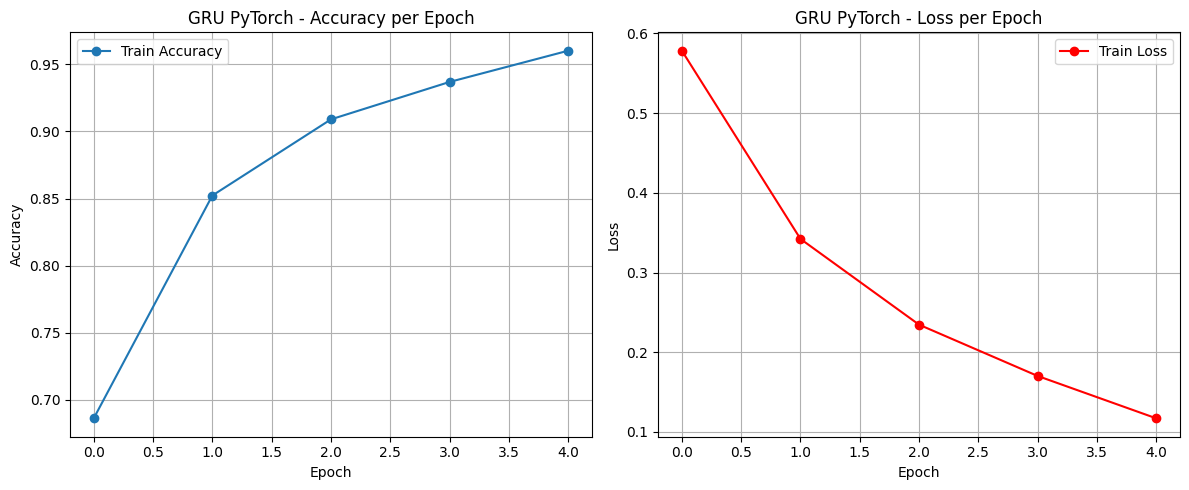

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(py_train_accuracies, label='Train Accuracy', marker='o')
plt.title("GRU PyTorch - Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(py_train_losses, label='Train Loss', marker='o', color='red')
plt.title("GRU PyTorch - Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

##4. Evaluasi Matriks

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set model ke eval mode
py_model.eval()

# Simpan semua prediksi dan label
py_all_preds = []
py_all_probs = []
py_all_labels = []

with torch.no_grad():
    for py_inputs, py_labels in py_test_loader:
        py_inputs = py_inputs.to(py_device)
        py_labels = py_labels.to(py_device)

        py_outputs = py_model(py_inputs).squeeze()
        py_probs = py_outputs.detach().cpu().numpy()
        py_preds = (py_probs >= 0.5).astype(int)

        py_all_probs.extend(py_probs)
        py_all_preds.extend(py_preds)
        py_all_labels.extend(py_labels.cpu().numpy())

# Hitung metrik
py_accuracy = accuracy_score(py_all_labels, py_all_preds)
py_precision = precision_score(py_all_labels, py_all_preds)
py_recall = recall_score(py_all_labels, py_all_preds)
py_f1 = f1_score(py_all_labels, py_all_preds)
py_auc = roc_auc_score(py_all_labels, py_all_probs)

print("=== PyTorch GRU Evaluation Metrics ===")
print(f"Akurasi  : {py_accuracy:.4f}")
print(f"Presisi  : {py_precision:.4f}")
print(f"Recall   : {py_recall:.4f}")
print(f"F1-Score : {py_f1:.4f}")
print(f"AUC      : {py_auc:.4f}")


=== PyTorch GRU Evaluation Metrics ===
Akurasi  : 0.8862
Presisi  : 0.8605
Recall   : 0.9220
F1-Score : 0.8902
AUC      : 0.9555


##5. Plot ROC Curve

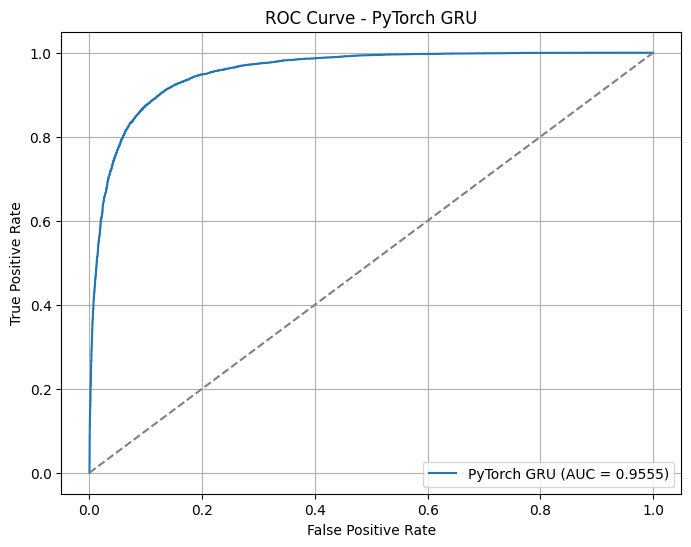

In [14]:
fpr, tpr, thresholds = roc_curve(py_all_labels, py_all_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'PyTorch GRU (AUC = {py_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PyTorch GRU')
plt.legend()
plt.grid(True)
plt.show()

#3.) Penjelasan Persamaan Matematika
Model GRU adalah jenis Recurrent Neural Network (RNN) yang dirancang untuk menangani long-term dependencies dalam data sekuensial tanpa masalah vanishing gradient. GRU menyederhanakan struktur LSTM, namun tetap efektif.

Rumus-Rumus GRU:
- $x_t$ = input pada waktu ke-$t$
- $h_{t-1}$ = hidden state sebelumnya
- $h_t$ = hidden state saat ini
- $z_t$ = update gate
- $r_t$ = reset gate
- $\overline{h}_t$ = kandidat hidden state<br><br>

##1. Update Gate $z_t$
Mengontrol seberapa banyak informasi dari hidden state sebelumnya akan dibawa ke langkah saat ini.
$$
z_t = \sigma(W_zx_t+U_zh_{t-1}+b_z)
$$<br><br>

##2. Reset Gate $r_t$
Mengontrol seberapa banyak informasi lama yang akan dilupakan.
$$
r_t = \sigma(W_rx_t+U_rh_{t-1}+b_r)
$$<br><br>

##3. Kandidat Hidden State $\overline{h}_t$
Mewakili informasi baru yang akan ditambahkan.
$$
\overline{h}_t = tanh(W_hx_t+U_h(r_t⊙h_{t-1})+b_h)
$$<br><br>

##4. Final Hidden State $h_t$
Kombinasi antara kandidat dan hidden state lama sesuai kontrol dari update gate.
$$
h_t = (1-z_t) ⊙ h_{t-1} + z_t ⊙ \overline{h}_t
$$<br><br>

Keterangan:
- $\sigma$ = fungsi aktivasi sigmoid
- $tanh$ = fungsi aktivasi hiperbolik
- $⊙$ = perkalian elemen-wise (Hadamard product)
- $W, U, b$ = parameter bobot dan bias yang dipelajari

##5. Akurasi
Mengukur seberapa banyak prediksi model yang benar.
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$<br><br>

Di mana:
- $TP (True Positive)$ = Kasus positif yang diprediksi positif
- $TF (True Negative)$ = Kasus negatif yang diprediksi negatif
- $FP (False Positive)$ = Kasus negatif yang salah diprediksi sebagai positif
- $FF (False Negative)$ = Kasus positif yang salah diprediksi sebagai negatif<br><br>

##6. Presisi
Mengukur ketepatan prediksi positif.
$$
Presisi = \frac{TP}{TP + FP}
$$<br><br>

##7. Recall
Mengukur seberapa banyak data positif yang berhasil diprediksi benar.
$$
Recall = \frac{TP}{TP + FN}
$$<br><br>

##8. F1-Score
Harmonic mean dari Precision dan Recall.
$$
F1-Score = 2 \times \frac{Precision×Recall}{Precision+Recall}
$$<br><br>

##9. AUC - Area Under Curve (ROC)
ROC Curve adalah grafik antara:
- True Positive Rate (TPR) = Recall
- False Positive Rate (FPR):
<br><br>
$$
FPR = \frac{FP}{FP + TN}
$$
<br><br>
Semakin tinggi AUC, semakin baik model membedakan antara kelas 1 dan kelas 0.
Nilai AUC:
- 0.5 = tebak-tebakan
- 0.7 - 0.8 = oke
- 0.8 - 0.9 = bagus
- 0.9 = sangat bagus